In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(20,15));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img);

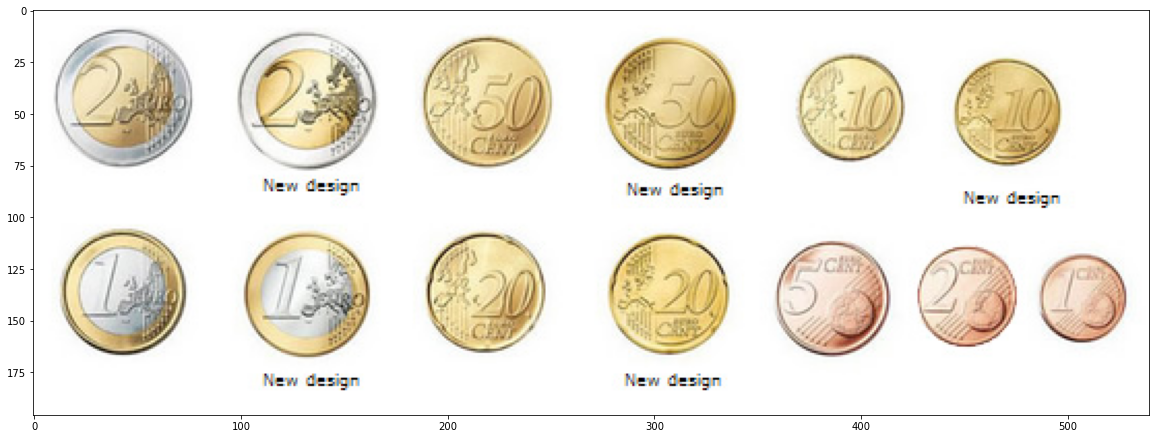

In [3]:
image = cv2.imread('img/coins2.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(rgb_img);

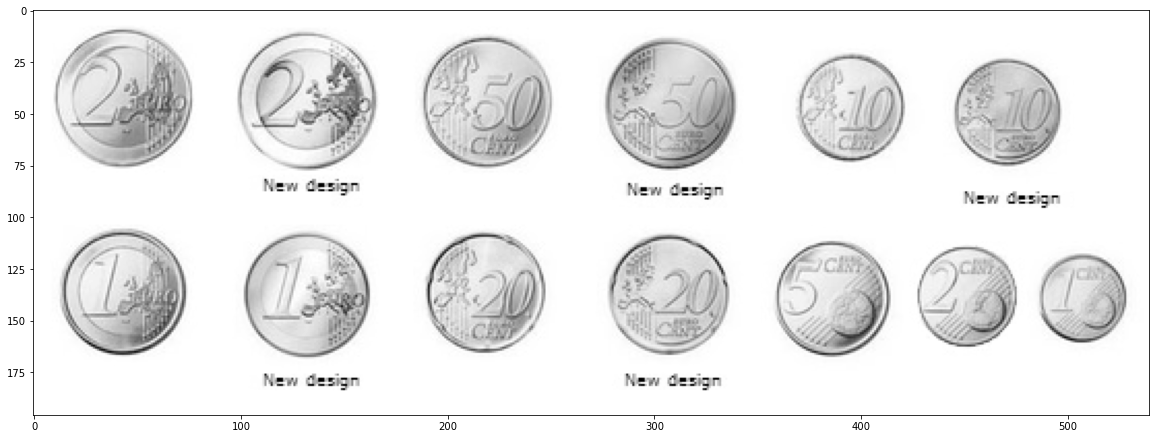

In [4]:
coins_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(coins_gray, True, False)

In [5]:
contours, h = cv2.findContours(coins_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

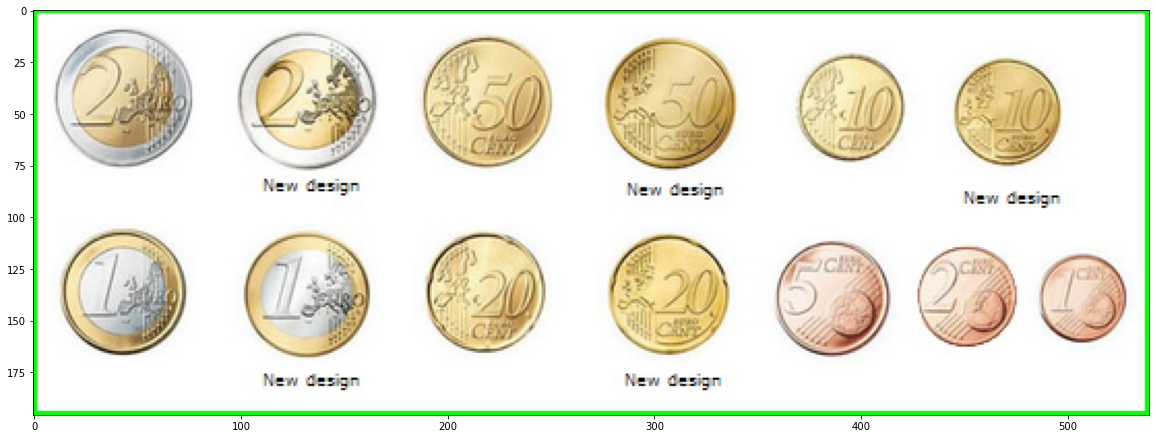

In [6]:
coins_contours = rgb_img.copy()
cv2.drawContours(coins_contours, contours, -1, (0,255,0), 2)
imshow(coins_contours)

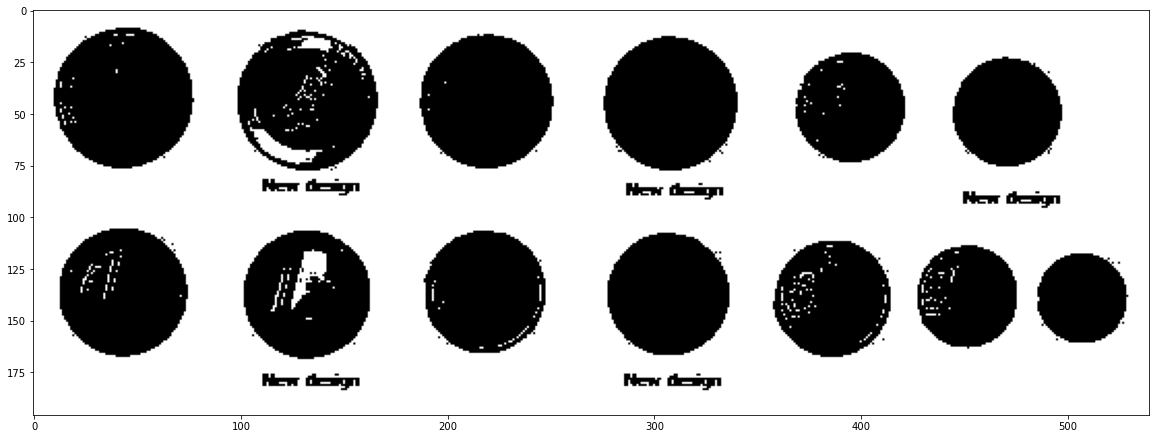

In [22]:
ret , th = cv2.threshold(coins_gray, 244, 255, cv2.THRESH_BINARY)
imshow(th,True,False)

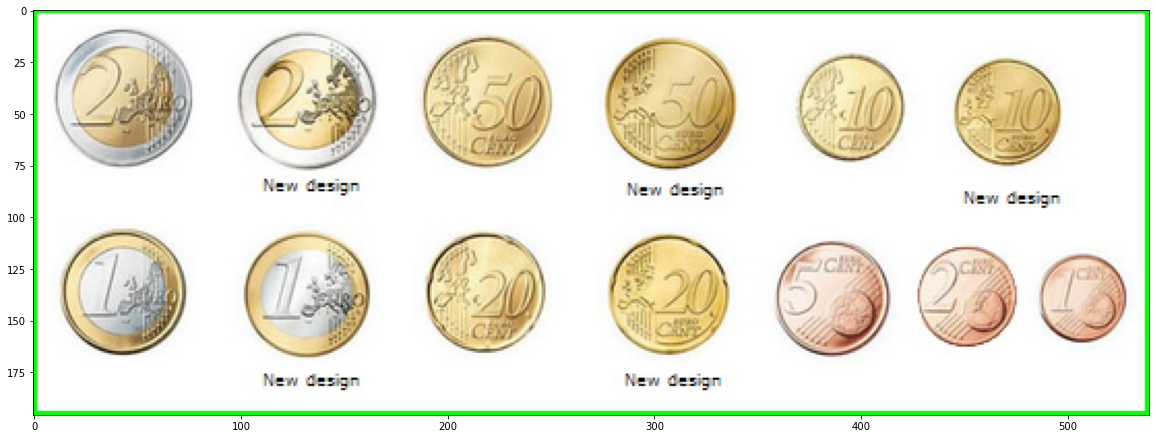

In [24]:
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coins_contours = rgb_img.copy()
cv2.drawContours(coins_contours, contours, -1, (0,255,0), 2)
imshow(coins_contours)

In [12]:
len(contours)

1

In [13]:
cv2.drawContours(coins_contours, contours, -1, (0,255,0),2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [18]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
len(sorted_contours)

1

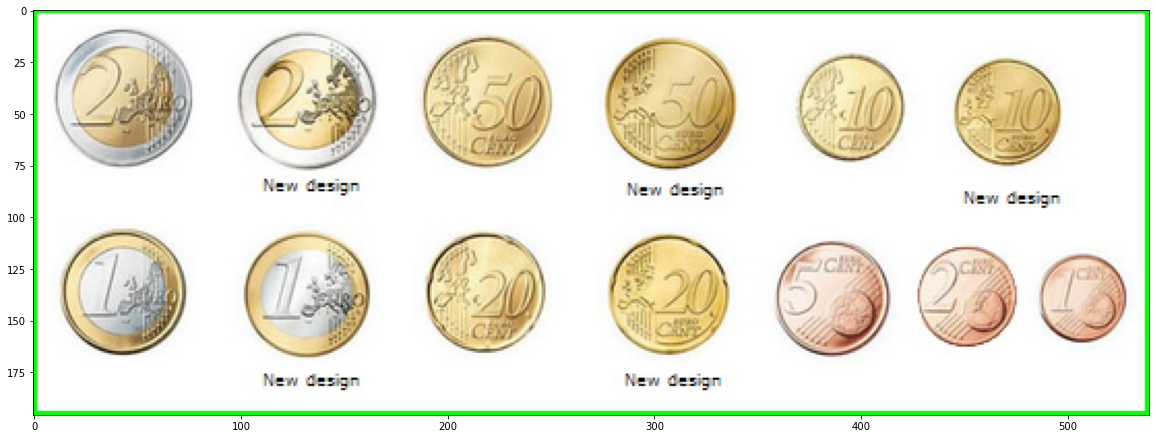

In [20]:
coins_contours = rgb_img.copy()

cv2.drawContours(coins_contours, sorted_contours[0:13], -1, (0,255,0),2)
imshow(coins_contours)

In [9]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [25]:
sort_left_to_right, boundingBoxes = sort_contours(sorted_contours[0:13])

In [27]:
coins_contours = rgb_img.copy()

cv2.drawContours(coins_contours, sort_left_to_right[4], -1, (0,255,0),2)
imshow(coins_contours)

IndexError: tuple index out of range

In [28]:
imshow(house, False, False)

NameError: name 'house' is not defined

In [ ]:
ret, th = cv2.threshold(house, 128, 255,cv2.THRESH_BINARY_INV)
imshow(th, False, False)